# **Effects of Alcohol on Student Performance**

The dataset “Effects of Alcohol on Student performance” is derived from a study with the same name, conducted by Joshua Naudé and Jordan Bendam, on how alcohol influences the academic performances of students from the Stellenbosch University in South Africa. The survey included factors relating to the students’ grade, year, college, monthly allowance, study duration, and many more. It also includes questions related to their alcohol consumption such as how many drinks they consume and how many classes they miss per week because of it (Naudé, 2024).




# **The Dataset**

In order to gather the necessary data, Naudé and Bendam created a survey composed of 16 questions related to socioeconomic factors, lifestyle choices, and any external support systems using Google Forms, to which it was distributed to the different online chat forums within the student body, garnering a total of 600+ student responses. Upon removing null data and renaming variables, the dataset decreased to 404 observations.

Each row in the dataset represents the individual student’s response to the questions given in the survey. For example, the first row contains the information of a 2nd Year Female student under the Arts & Social Sciences faculty, the second row containing the information about a male 2nd Year student who is under the Economic & Management Sciences faculty, and so on.

Each column, on the other hand, corresponds to the variable or attribute related to socioeconomic factors, lifestyle choices, and external support systems that affect the students’ performance.

- **`Sex`**: The biological identity of the student
- **`Matric_Avg`**: The student’s matric average
- **`Study_Year`**: The student’s current year
- **`Faculty`**: The college or faculty the student’s degree is under
- **`Accom_Status`**: The student’s accommodation status (private/within the university)
- **`Monthly_Allowance`**: The monthly allowance the student receives, in Rands currency
- **`Scholarship`**: Whether the student has a scholarship or not
- **`Wkly_Stdy_Hrs`**: The amount of time in hours the student spends studying per week
- **`Socializing_Freq`**: How often does the student go to social gatherings
- **`Drinks_per_Night`**: How much alcohol the student consumes when going out
- **`Missed_Classes`**: The number of classes a student misses per week due to alcohol reasons (hangovers, etc.)
- **`Failed_Modules`**: How many modules a student has failed
- **`Relationship`**: Whether the student is in a romantic relationship or not
- **`Approval`**: Whether or not the student has obtained permission from their parent/s to consume alcohol
- **`Parent_Strength`**: How close the student’s relationship with their parent/s is.

The dataset also included the timestamp of when the student answered the survey.




### **Importing Libraries**

The following are the imported libraries used in the dataset.
- **`numpy`**: Used to manage arrays and perform certain operations on them (W3Schools.com, n.d.).
- **`pandas`**: Used for data analysis and data manipulation (Suhani, 2020).
- **`scipy.stats`**: Used for probability distribution and statistical operations (GeeksforGeeks, 2023).
- **`seaborn`**: Used to visualize graphs in Python (GeeksforGeeks, 2023b).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stats_df = pd.read_csv("/content/drive/MyDrive/Stats survey.csv")

In [ ]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

In [ ]:
# Renaming variables
stats_df = stats_df.rename(columns={
 "Timestamp" : "Timestamp",
 "Your Sex?" : "Sex",
 "Your Matric (grade 12) Average/ GPA (in %)" : "Matric_Avg",
 "What year were you in last year (2023) ?" : "Study_Year",
 "What faculty does your degree fall under?" : "Faculty",
 "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)" : "GPA",
 "Your Accommodation Status Last Year (2023)" : "Accom_Status",
 "Monthly Allowance in 2023" : "Monthly_Allowance",
 "Were you on scholarship/bursary in 2023?" : "Scholarship",
 "Additional amount of studying (in hrs) per week" : "Wkly_Stdy_Hrs",
 "How often do you go out partying/socialising during the week? " : "Socializing_Freq",
 "On a night out, how many alcoholic drinks do you consume?" : "Drinks_per_Night",
 "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)" : "Missed_Classes",
 "How many modules have you failed thus far into your studies?" : "Failed_Modules",
 "Are you currently in a romantic relationship?" : "Relationship",
 "Do your parents approve alcohol consumption?" : "Approval",
 "How strong is your relationship with your parent/s?" : "Parent_Strength"
})

stats_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          406 non-null    object 
 1   Sex                404 non-null    object 
 2   Matric_Avg         399 non-null    float64
 3   Study_Year         333 non-null    object 
 4   Faculty            399 non-null    object 
 5   GPA                320 non-null    float64
 6   Accom_Status       383 non-null    object 
 7   Monthly_Allowance  375 non-null    object 
 8   Scholarship        398 non-null    object 
 9   Wkly_Stdy_Hrs      403 non-null    object 
 10  Socializing_Freq   404 non-null    object 
 11  Drinks_per_Night   404 non-null    object 
 12  Missed_Classes     403 non-null    object 
 13  Failed_Modules     403 non-null    object 
 14  Relationship       403 non-null    object 
 15  Approval           402 non-null    object 
 16  Parent_Strength    403 non

# **Data Cleaning**

This section of the notebook performs data cleaning methods to remove inconsistencies, missing or duplicate values, and others that may cause problems during the analysis process.

In [ ]:
nan_counts = stats_df.isna().sum(axis=0)
print(nan_counts)

Timestamp             0
Sex                   2
Matric_Avg            7
Study_Year           73
Faculty               7
GPA                  86
Accom_Status         23
Monthly_Allowance    31
Scholarship           8
Wkly_Stdy_Hrs         3
Socializing_Freq      2
Drinks_per_Night      2
Missed_Classes        3
Failed_Modules        3
Relationship          3
Approval              4
Parent_Strength       3
dtype: int64


There are 109 entries with NaN values. We can drop observations with NaN values in the following variables:
`Sex`, `Matric_Avg`, `Faculty`, `Scholarship`, `Wkly_Stdy_Hrs`, `Socializing_Freq`, `Drinks_per_Night`, `Missed_Classes`, `Failed_Modules`, `Relationship`, `Approval`, and `Parent_Strength`

In [ ]:
# `Sex`, `Matric_Avg`, `Faculty`, `Scholarship`, `Wkly_Stdy_Hrs`, `Socializing_Freq`, `Drinks_per_Night`, `Missed_Classes`, `Failed_Modules`, `Relationship`, `Approval`, and `Parent_Strength`

stats_df = stats_df.dropna(subset=["Sex", "Matric_Avg", "Faculty", "Scholarship", "Wkly_Stdy_Hrs", "Socializing_Freq", "Drinks_per_Night", "Missed_Classes", "Failed_Modules", "Relationship", "Approval", "Parent_Strength"])


In [ ]:
nan_counts = stats_df.isna().sum(axis=0)
print(nan_counts)

Timestamp             0
Sex                   0
Matric_Avg            0
Study_Year           61
Faculty               0
GPA                  71
Accom_Status         14
Monthly_Allowance    23
Scholarship           0
Wkly_Stdy_Hrs         0
Socializing_Freq      0
Drinks_per_Night      0
Missed_Classes        0
Failed_Modules        0
Relationship          0
Approval              0
Parent_Strength       0
dtype: int64


In [ ]:
for column in stats_df.columns:
  unique_values = stats_df[column].unique()
  print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Timestamp': ['2024/03/07 5:12:01 pm EET' '2024/03/07 5:12:08 pm EET'
 '2024/03/07 5:12:25 pm EET' '2024/03/07 5:12:28 pm EET'
 '2024/03/07 5:13:00 pm EET' '2024/03/07 5:13:18 pm EET'
 '2024/03/07 5:13:22 pm EET' '2024/03/07 5:13:26 pm EET'
 '2024/03/07 5:13:35 pm EET' '2024/03/07 5:14:04 pm EET'
 '2024/03/07 5:14:06 pm EET' '2024/03/07 5:14:08 pm EET'
 '2024/03/07 5:14:10 pm EET' '2024/03/07 5:14:43 pm EET'
 '2024/03/07 5:14:50 pm EET' '2024/03/07 5:14:51 pm EET'
 '2024/03/07 5:15:05 pm EET' '2024/03/07 5:15:08 pm EET'
 '2024/03/07 5:15:13 pm EET' '2024/03/07 5:15:43 pm EET'
 '2024/03/07 5:15:47 pm EET' '2024/03/07 5:16:06 pm EET'
 '2024/03/07 5:16:35 pm EET' '2024/03/07 5:16:56 pm EET'
 '2024/03/07 5:17:06 pm EET' '2024/03/07 5:17:09 pm EET'
 '2024/03/07 5:17:22 pm EET' '2024/03/07 5:17:28 pm EET'
 '2024/03/07 5:17:39 pm EET' '2024/03/07 5:18:18 pm EET'
 '2024/03/07 5:18:41 pm EET' '2024/03/07 5:18:56 pm EET'
 '2024/03/07 5:19:16 pm EET' '2024/03/07 5:19:55 pm EET'


Based on the unique values for each variable, it seems that there are no invalid values (i.e. Multiple Representations, Incorrect Datatypes), furthermore - observations with invalid missing data have been.

In [ ]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 404
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          382 non-null    object 
 1   Sex                382 non-null    object 
 2   Matric_Avg         382 non-null    float64
 3   Study_Year         321 non-null    object 
 4   Faculty            382 non-null    object 
 5   GPA                311 non-null    float64
 6   Accom_Status       368 non-null    object 
 7   Monthly_Allowance  359 non-null    object 
 8   Scholarship        382 non-null    object 
 9   Wkly_Stdy_Hrs      382 non-null    object 
 10  Socializing_Freq   382 non-null    object 
 11  Drinks_per_Night   382 non-null    object 
 12  Missed_Classes     382 non-null    object 
 13  Failed_Modules     382 non-null    object 
 14  Relationship       382 non-null    object 
 15  Approval           382 non-null    object 
 16  Parent_Strength    382 non-null

Upon removing invalid observations with invalid NaN values, there are now 382 entries left.

Additionally, in the variable "Socializing_Freq", there is a value "Only weekends" that is different from the rest of the options the students were to choose from, which are "0, 1, 2, 3, 4+" days per week. To standardize this and make it easier to analyze, the "Only weekends" value is replaced with a '1'.

In [ ]:
stats_df["Socializing_Freq"] = stats_df["Socializing_Freq"].replace("Only weekends", "1")

# **Exploratory Data Analysis**

This section of the notebook performs the analysis process on the dataset in order to derive conclusions using visualization techniques. This specific dataset looks into the correlations between excessive alcohol consumption on a student's academic performance through socioeconomic factors, lifestyle choices, and external support systems.

## Question 1: Does going out more means you drink more per night?

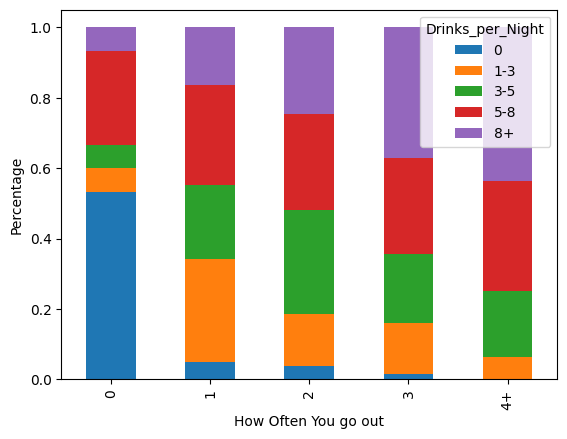

In [ ]:
crosstab = pd.crosstab(stats_df['Socializing_Freq'], stats_df['Drinks_per_Night'])
crosstab_norm = crosstab.div(crosstab.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)
plt.xlabel('How Often You go out')
plt.ylabel('Percentage')
plt.show()

Looking at the stacked bar chart, we can see that the more a person goes out, the more likely they are to drink more often. In the 0 category of How often you go out, majority of the sample there doesn't drink when they go out. Compare this to the people who go out often that drink more than 5 drinks. We can verify this with a chi-square test of independence.

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 93.38507798157153
P-value: 5.925257207618277e-13


Since the chi-square statistic is high p-value is low, there seems to be a strong association with the two variables.

## Question 2: Does Weekly Study Hours affect GPA

To see whether drinking does help improve students' grades or if it's actually just studying, let's check the weekly study hours first.

First, let's separate the data with GPA and those that don't (frosh) to be able to compare GPA among different groups.

In [ ]:
frosh_df = stats_df[stats_df["GPA"].isna()]
sophomore_and_above_df = stats_df[~stats_df.index.isin(frosh_df.index)]

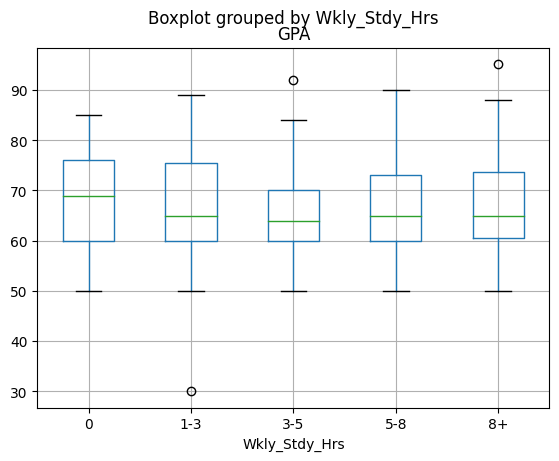

In [ ]:
sophomore_and_above_df.boxplot('GPA', by='Wkly_Stdy_Hrs')
plt.show()

In [ ]:
study_freq = sophomore_and_above_df.groupby('Wkly_Stdy_Hrs').agg({'GPA': ['mean','median', 'std']})
study_freq.sort_values([('GPA', 'mean')], ascending=False, inplace=True)
print(study_freq)

                     GPA                  
                    mean median        std
Wkly_Stdy_Hrs                             
0              67.705882   69.0  11.038369
8+             67.339053   65.0   9.018474
1-3            66.746032   65.0  10.237452
5-8            66.280952   65.0   8.733249
3-5            64.986301   64.0   8.278978


From the boxplot and the summary statistics, there seems to be no correlation between the students' GPA and the weekly study hours for this population.

## Question 3: Does how much you drink affect GPA?

Since there is already a strong association between how often a person goes out and how much they drink that night, we can use **`Socializing_Freq`** as a metric for how much, generally, a person drinks and gets drunk.

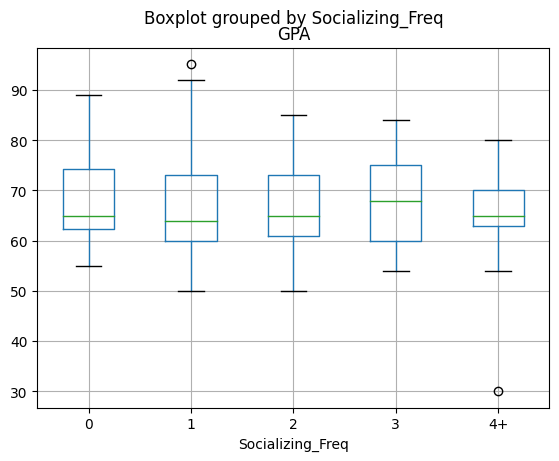

In [ ]:
sophomore_and_above_df.boxplot('GPA', by='Socializing_Freq')
plt.show()

In [ ]:
study_freq = sophomore_and_above_df.groupby('Socializing_Freq').agg({'GPA': ['mean','median', 'std']})
study_freq.sort_values([('GPA', 'mean')], ascending=False, inplace=True)
print(study_freq)

                        GPA                  
                       mean median        std
Socializing_Freq                             
3                 67.993878   68.0   8.247333
0                 67.324167   65.0   9.774601
2                 67.000000   65.0   8.498162
1                 65.955349   64.0   9.328406
4+                64.153846   65.0  12.740004


Similar to weekly study hours, there seems to be no correlation between how much a person drinks and their GPA.

## Question 4: Does drinking more cause students to fail more modules?

 To further investigate whether or not consuming alcohol causes a student to fail more modules, we can use another metric of performance which is their completion of modules.

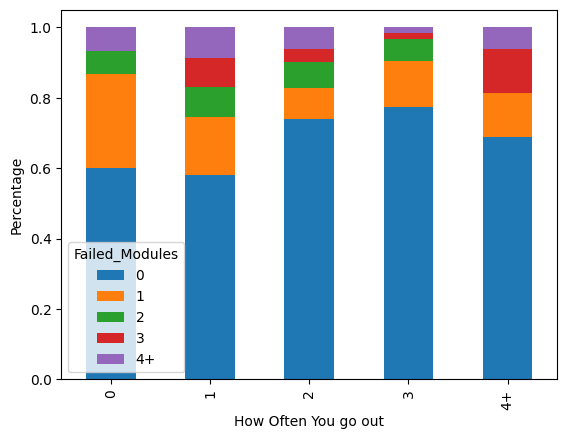

In [ ]:
crosstab = pd.crosstab(stats_df['Socializing_Freq'], stats_df['Failed_Modules'])
crosstab_norm = crosstab.div(crosstab.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)
plt.xlabel('How Often You go out')
plt.ylabel('Percentage')
plt.show()

Looking at the stacked bar chart, there doesn't seem to be a strong correlation between the two as the ratio of failed modues largely stays the same even at both ends of the spectrum of how much they go out.

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 19.732117675581254
P-value: 0.23252902910270512


This is further supported by the p-value of the chi-square test being more than 0.05.

# **Research Question**

This can be approached by exploring the dataset and making mathematical inferences using Two-way ANOVA to test whether two set of variables (namely one's current year and alcohol consumption) affect an independent variable (academic performance).

Or alternatively, using association rule mining which explores how well related certain combinations of features are, we can also check the confidence behind the question of whether **Does one's senior year level and strong parental support lead to approval in drinking?** and other possible variations brought upon by association rule learning using this data set.



# **Data Modeling**

## Preprocessing


Since we are using Association Rule Mining to get insights on which variables are associated and Chi-Square Test of Independence to compare the association of each categorical variable, the frequencies of each category should be checked to ensure that no one category is too sparse.

In [ ]:
dropped = stats_df.dropna(subset=['Study_Year'])
print(dropped['Study_Year'].value_counts(),'\n')
print(dropped['Parent_Strength'].value_counts(),'\n')
print(dropped['Approval'].value_counts())

Study_Year
2nd Year        148
1st Year        122
3rd Year         39
4th Year          7
Postgraduate      5
Name: count, dtype: int64 

Parent_Strength
Very close    212
Close          76
Fair           31
Distant         2
Name: count, dtype: int64 

Approval
Yes    278
No      43
Name: count, dtype: int64


Since the frequencies of 4th Year and Postgraduate in Study_Year and Distant and Fair in Parent_Strength is too low, we can group these categories into one instead since they are adjacent in ordinal ordering.

In [ ]:
dropped['Parent_Strength'] = dropped['Parent_Strength'].replace(['Fair', 'Distant'], 'Fair and Distant')
dropped['Study_Year'] = dropped['Study_Year'].replace(['3rd Year', '4th Year', 'Postgraduate'], '3rd Year and Above')

print(dropped['Study_Year'].value_counts(),'\n')
print(dropped['Parent_Strength'].value_counts(),'\n')

Study_Year
2nd Year              148
1st Year              122
3rd Year and Above     51
Name: count, dtype: int64 

Parent_Strength
Very close          212
Close                76
Fair and Distant     33
Name: count, dtype: int64 



<ipython-input-50-d5257cd23260>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['Parent_Strength'] = dropped['Parent_Strength'].replace(['Fair', 'Distant'], 'Fair and Distant')
<ipython-input-50-d5257cd23260>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['Study_Year'] = dropped['Study_Year'].replace(['3rd Year', '4th Year', 'Postgraduate'], '3rd Year and Above')


To do association rule mining using the apriori algorithm, we would need to take the three variables/columns and combine them into array, so that the algorithm can see it as a basket.

In [ ]:
columns_of_interest = dropped[['Parent_Strength', 'Study_Year', 'Approval']]
series_of_arrays = columns_of_interest.apply(lambda row: row.values, axis=1)
columns_of_interest.head()

,Parent_Strength,Study_Year,Approval
0,Very close,2nd Year,Yes
1,Very close,2nd Year,Yes
2,Very close,1st Year,Yes
3,Very close,2nd Year,Yes
4,Fair and Distant,2nd Year,Yes


We then take this series of lists and perform one-hot encoding to represent it as a matrix

In [ ]:
unique_categories = [
    'Very close', 'Close', 'Fair and Distant', 'Yes', 'No',
    '1st Year', '2nd Year', '3rd Year and Above'
]

def one_hot_encode(array, categories):
    one_hot = pd.Series(array).apply(lambda x: pd.Series([1 if x == cat else 0 for cat in categories], index=categories))
    return one_hot.sum(axis=0)

# Apply one-hot encoding to each array in the series and concatenate the results
one_hot_encoded_df = series_of_arrays.apply(lambda x: one_hot_encode(x, unique_categories))
one_hot_encoded_df.head()

,Very close,Close,Fair and Distant,Yes,No,1st Year,2nd Year,3rd Year and Above
0,1,0,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,0
4,0,0,1,1,0,0,1,0


## Apriori Algorithm

After performing the necessary preprocessing operations, we now proceed to use the Apriori Algorithm in order to gain further insight on the relationships between the students' year level, parental strength, and parental approval.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/')
from rule_miner import *

support_t = 25;
confidence_t = 0.85;

ruleminer = RuleMiner(support_t, confidence_t);

rules = ruleminer.get_association_rules(one_hot_encoded_df)
print(rules)

[[['1st Year', 'Very close'], ['Yes']], [['2nd Year', 'Very close'], ['Yes']], [['3rd Year and Above', 'Very close'], ['Yes']]]


With an 85% threshold that the combination of year level and degree of closeness leads to an approval of the parents with regard to their child's drinking, we were able to narrow down the associative rule mining's 'Yes'-leaning itemsets to the following combinations:

* 1st Year & Very Close
* 2nd Year & Very Close
* 3rd Year and Above & Very Close

Having narrowed down the itemsets to the aforementioned combinations, there is significant data to insinuate that a **very close parental support** strength often leads to their approval of their child's drinking habits. This is also true for students **regardless of which level** they are from.

It is also worth noting that, given the thresholds specified in the code (at least 25 support and 85% confidence), there are no **persisting itemsets** that support that the **disapproval of the parents** considering the student's year level and strength of parental support.

# **Statistical Inference**

## Chi-square Test of Independence

A test of independence was conducted to check how the categories of student year level, parental support would relate to how the parents approve of their child’s drinking choices (pertaining to alcoholic beverages).

This test of independence was chosen as it fits the criteria of using categorical values instead of numerical. As such, chi-square test of independence makes it so that the data are tested with the expected results, and thus, checks if there is a valid association between the two categories being tested.

The two relationships being tested are as follows:
* Parents Approval and Student Year Level
* Parents Approval and Parental Support


## Parent Relationship Strength and Parent Approval

To further inspect if the variables `Parent_Strength`, `Study_Year`, and `Approval`, and are truly related or independent of each other.

For this test, we used Pearson's Chi-Squared Test. For this test, the significance level is set at 5% (0.05). We also define the following:

**Null Hypothesis: How strong their relationship with their parent is independent of their parent's approval of them drinking.**

**Alternative Hypothesis: How strong their relationship with their parent is associated with their parent's approval of them drinking.**

In [ ]:
crosstab = pd.crosstab(columns_of_interest['Parent_Strength'], columns_of_interest['Approval'])

chi2, p, dof, expected = chi2_contingency(crosstab)
V = np.sqrt(chi2 / (columns_of_interest.shape[0] * (min(crosstab.shape)-1)))
print('Chi-Square: {:.4f}'.format(chi2))
print('p-value: ', p)
print('DOF: ', dof)
print("Cramer's V: {:.3f}".format(V))
print('Expected:\n', expected)
print('Crosstab:\n', crosstab)

Chi-Square: 11.7038
p-value:  0.0028744913901971847
DOF:  2
Cramer's V: 0.191
Expected:
 [[ 10.18068536  65.81931464]
 [  4.42056075  28.57943925]
 [ 28.39875389 183.60124611]]
Crosstab:
 Approval          No  Yes
Parent_Strength          
Close             15   61
Fair and Distant   9   24
Very close        19  193


Based on the results, it was found that `Parent_Strength` and `Approval` are related. This is because the p-value (0.003) yielded by the test is lower than the significance level of 0.05, therefore, **rejecting the null hypothesis.** We can also see that the association is weak using Cramer's V, which ranges from 0 to 1 and 1 being perfectly associated.

## Year Level and Parent Approval

The next test compares the variables `Study_Year` and `Approval`. For this test, the significance level is also set at 5% (0.05). We also define the following:

**Null Hypothesis: Their current year level is independent of their parent's approval of them drinking.**

**Alternative Hypothesis: Their current year level is associated with their parent's approval of them drinking.**

In [ ]:
crosstab = pd.crosstab(columns_of_interest['Study_Year'], columns_of_interest['Approval'])

chi2, p, dof, expected = chi2_contingency(crosstab)
V = np.sqrt(chi2 / (columns_of_interest.shape[0] * (min(crosstab.shape)-1)))
print('Chi-Square: {:.4f}'.format(chi2))
print('p-value: ', p)
print('DOF: ', dof)
print("Cramer's V: {:.3f}".format(V))
print('Expected:\n', expected)
print('Crosstab:\n', crosstab)

Chi-Square: 0.7630
p-value:  0.6828520902390014
DOF:  2
Cramer's V: 0.049
Expected:
 [[ 16.34267913 105.65732087]
 [ 19.82554517 128.17445483]
 [  6.8317757   44.1682243 ]]
Crosstab:
 Approval            No  Yes
Study_Year                 
1st Year            18  104
2nd Year            20  128
3rd Year and Above   5   46


Unlike the first test, there is no association between variables `Study_Year` and `Approval` because the p-value (0.68) **failed to reject the null hypothesis**, as it yielded a value higher than the signficance level.

Given that the **Parent Approval** and **Student Year** level are associated, while the **Parent Approval** and **Parental Support Strength** are not, this does not give us an outright view of how both categories can relate to the parent approval. This is one more reason to pursue **Association Rule Mining** as a way to gather conclusive info as to how the three categories interplay or relate, particularly how the combination of senior year level and strong parental support leads to parental approval in drinking.

# **Conclusion**

The most prominent research question arising from the dataset is one involving **parental support strength** and **student year level** in determining the **parents' approval** in their child's drinking habits. There is a significant push to study this research question from previous data visualization and initial hypothesis testing leaning towards **associating drinking and student performance**, which begs the question of **whether the parents approve of these habits and for which reasons?**

Given this research question, the group has started working on the possibility of using association rule mining to establish and explore the following arguments:
* Does a **strong parental support** lead to parental approval in drinking?
* Does belonging to a **senior year level** lead to parental approval in drinking?
* When combined, how do the implications of **senior year level and strong parental support** interplay?

Using the association rule mining techniques we have processed the data through, we were able to determine 3 itemsets that are frequently occuring with at least 25 occurences of the set, and established a confidence of 85% that year level (1st, 2nd, 3and above) and parental support (Weak, Strong, Very Strong) leads to approval (Yes/No). We also noticed that "very close" parental relationship is one of the antecedents across all year levels, which really puts the parental support strength at the forefront of the determining factor at face value of the dataset that supports this information.

To reiterate, the persisting itemsets are as follows:
* 1st Year & Very Close
* 2nd Year & Very Close
* 3rd Year and Above & Very Close
All of which led to parental approval.

In more technical interpretation, this answers the research question by confirming that a **senior year level and very strong parental support leads to drinking approval**, however, it does not single out very strong parental support as the only key factor that arrives to this causality, nor does the year level also affect drinking approval when considered on its own.

Still, it opens the possibility of opening research questions centered on parental support on the student, as it seems to be a driving factor that  leads to drinking approval across **all year levels**.

To supplement the findings of the association rule mining technique used, the chi-square test of independence also shows that there is indeed no association between approval and student year level, but there is association between parental support and approval. This further drives the point that the approval for drinking largely depends on parental support strength.

In future iteration of this research, the impact of other aspects like GWA and Attendance in class to further inspect how alcoholism can affect student performance on a much deeper level, and influenced by other factors.





# **References**

GeeksforGeeks. (2023, February 1). SciPY Stats. GeeksforGeeks. https://www.geeksforgeeks.org/scipy-stats/

GeeksforGeeks. (2023b, May 23). Introduction to Seaborn Python. GeeksforGeeks. https://www.geeksforgeeks.org/introduction-to-seaborn-python/

Naudé, J. (2024, May 13). Joshua Naudé on LinkedIn: Alcohol, Lifestyle & Academic Success at University | 27 comments. https://www.linkedin.com/posts/joshuanaude_alcohol-lifestyle-academic-success-at-activity-7195694264322842624-R1DP?fbclid=IwAR2jZvyEdh7ECw7k0m5qWcgWTmPGxPYZ2_V5cVViLrHRdsHIR3bBI3lRrao

Suhani, S. (2024, January 24). What is Pandas in Python? Everything you need to know. ActiveState. https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/

W3Schools.com. (n.d.). https://www.w3schools.com/python/numpy/numpy_intro.asp

